In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from  sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [67]:
df= pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [68]:
df.shape

(8124, 23)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [70]:
df2 = df.sample(frac = 1)

In [71]:
df3 = df2.sample(frac = 0.5)

In [72]:
df3.shape

(4062, 23)

In [73]:
df.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [74]:
for label in df.columns:
    df[label] = LabelEncoder().fit(df[label]).transform(df[label])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [76]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [77]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [78]:
#spliting the datset into features and target
x = df.drop('class',axis = 1)
y = df['class']

In [79]:
x.shape

(8124, 22)

In [80]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [81]:
#spliting the dataset into test and train set
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state=0)

In [82]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 1)
AdaBoost = AdaBoostClassifier(base_estimator = model,n_estimators = 400,learning_rate = 1)
boost_model = AdaBoost.fit(xtrain,ytrain)
ypred = boost_model.predict(xtest)
acdcte = metrics.accuracy_score(ytest,ypred)
print("The Accuracy is :",acdcte*100,'%')

The Accuracy is : 100.0 %


In [83]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 1)
AdaBoost = AdaBoostClassifier(base_estimator = model,n_estimators = 400,learning_rate = 1)
boost_model = AdaBoost.fit(xtrain,ytrain)
ypred = boost_model.predict(xtest)
acdctg = metrics.accuracy_score(ytest,ypred)
print("The Accuracy is :",acdctg*100,'%')

The Accuracy is : 100.0 %


In [84]:
#prepruning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
params ={
    'max_depth' :[2,4,6,8,10,12],
    'min_samples_split' :[2,3,4],
    'min_samples_leaf':[1,2]
}
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dtc,param_grid = params)
gscv.fit(xtrain,ytrain)
model = gscv.best_estimator_
model.fit(xtrain,ytrain)
metrics.accuracy_score(ytest,model.predict(xtest))

1.0

In [85]:
#postpruning 
path = dtc.cost_complexity_pruning_path(xtrain,ytrain)
ccp_alphas,impurities = path.ccp_alphas,path.impurities
print(ccp_alphas)

[0.         0.00157529 0.00198124 0.00234913 0.00314624 0.00449821
 0.00538901 0.00945696 0.0100585  0.01171151 0.01190466 0.01820717
 0.06217326 0.07937475 0.08931334 0.1687464 ]


In [86]:
clfs = []
for ccpalpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0,ccp_alpha = ccpalpha)
    clf.fit(xtrain,ytrain)
    clfs.append(clf)

In [87]:
train_ac = []
test_ac = []
for c in clfs:
    ytrainpred = c.predict(xtrain)
    ytestpred = c.predict(xtest)
    train_ac.append(metrics.accuracy_score(ytrain,ytrainpred))
    test_ac.append(metrics.accuracy_score(ytest,ytestpred))

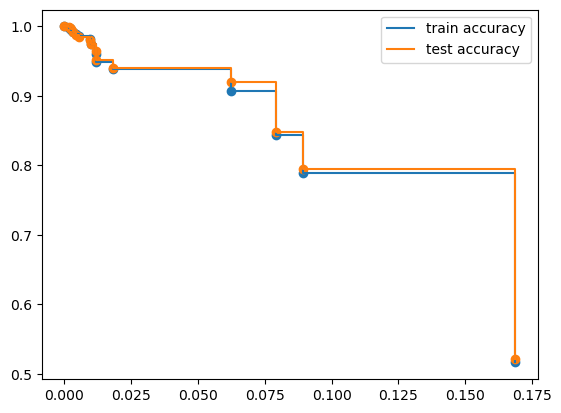

In [91]:
from matplotlib import pyplot as plt
plt.scatter(ccp_alphas,train_ac)
plt.scatter(ccp_alphas,test_ac)
plt.plot(ccp_alphas,train_ac,label= 'train accuracy',drawstyle = 'steps-post')
plt.plot(ccp_alphas,test_ac,label= 'test accuracy',drawstyle = 'steps-post')
plt.legend()
plt.show()